# Integração Hive x Pandas 

In [11]:
from pyhive import hive
import pandas as pd

PORT=10000
conn = hive.Connection(host="127.0.0.1", port=PORT, username="silvio")

print(conn)

In [12]:
dataframe = pd.read_sql("show databases", conn)
print(dataframe)

  database_name
0       default
1       modelos
2      modelos2
3         olist


In [13]:
dataframe = pd.read_sql("select * from modelos.diabetes", conn)
print(dataframe.describe())

       diabetes.pregnancies  diabetes.glucose  diabetes.bloodpressure  \
count            768.000000        768.000000              768.000000   
mean               3.845052        120.894531               69.105469   
std                3.369578         31.972618               19.355807   
min                0.000000          0.000000                0.000000   
25%                1.000000         99.000000               62.000000   
50%                3.000000        117.000000               72.000000   
75%                6.000000        140.250000               80.000000   
max               17.000000        199.000000              122.000000   

       diabetes.skinthickness  diabetes.insulin  diabetes.bmi  \
count              768.000000        768.000000    768.000000   
mean                20.536458         79.799479     31.992578   
std                 15.952218        115.244002      7.884160   
min                  0.000000          0.000000      0.000000   
25%              

# dataset olist

In [14]:
dataframe = pd.read_sql("select * from pedidos", conn)
print(dataframe.head(5))

                     pedidos.order_id                 pedidos.customer_id  \
0                          "order_id"                       "customer_id"   
1    e481f51cbdc54678b7cc49136f2d6af7  "9ef432eb6251297304e76186b10a928d"   
2  "53cdb2fc8bc7dce0b6741e2150273451"    b0830fb4747a6c6d20dea0b8c802d7ef   
3  "47770eb9100c2d0c44946d9cf07ec65d"  "41ce2a54c0b03bf3443c3d931a367089"   
4  "949d5b44dbf5de918fe9c16f97b45f8a"    f88197465ea7920adcdbec7375364d82   

  pedidos.order_status pedidos.order_purchase_timestamp  \
0       "order_status"       "order_purchase_timestamp"   
1            delivered              2017-10-02 10:56:33   
2            delivered              2018-07-24 20:41:37   
3            delivered              2018-08-08 08:38:49   
4            delivered              2017-11-18 19:28:06   

  pedidos.order_approved_at pedidos.order_delivered_carrier_date  \
0       "order_approved_at"       "order_delivered_carrier_date"   
1       2017-10-02 11:07:15                  2

In [15]:

dataframe = pd.read_sql("select * from customers", conn)
print(dataframe.head(5))

                customers.customer_id        customers.customer_unique_id  \
0                       "customer_id"                "customer_unique_id"   
1  "06b8999e2fba1a1fbc88172c00ba8bc7"  "861eff4711a542e4b93843c6dd7febb0"   
2  "18955e83d337fd6b2def6b18a428ac77"  "290c77bc529b7ac935b93aa66c333dc3"   
3  "4e7b3e00288586ebd08712fdd0374a03"  "060e732b5b29e8181a18229c7b0b2b5e"   
4    b2b6027bc5c5109e529d4dc6358b12c3  "259dac757896d24d7702b9acbbff3f3c"   

  customers.customer_zip_code_prefix customers.customer_city  \
0                               None         "customer_city"   
1                               None                  franca   
2                               None   sao bernardo do campo   
3                               None               sao paulo   
4                               None         mogi das cruzes   

  customers.customer_state  
0         "customer_state"  
1                       SP  
2                       SP  
3                       SP  
4      

In [ ]:
# gerando gráfico a partir de tabela preparada no hive

In [24]:
dataframe = pd.read_sql("select customer_state, count(*) from pedido_cliente_join group by customer_state", conn)
print(dataframe.columns)

Index(['customer_state', '_c1'], dtype='object')


/home/silvio/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:575: UserWarning: The handle <BarContainer object of 28 artists> has a label of '_c1' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


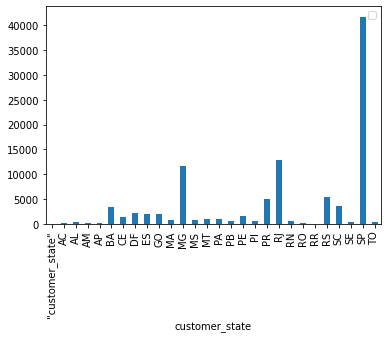

In [25]:
dataframe.plot.bar(x='customer_state', y='_c1')